In [68]:
import pandas as pd
import numpy as np

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import yfinance as yf

In [71]:
# CSV filr import
ticker = "LHA.DE"  # Lufthansa's tiker symbol
df = yf.download(ticker, period="max")

[*********************100%%**********************]  1 of 1 completed


In [72]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-12-16,7.597196,7.688404,7.392869,7.462167,4.093603,1066584
1996-12-17,7.425698,7.622745,7.370959,7.615466,4.177701,1052852
1996-12-18,7.626385,7.805162,7.527897,7.564366,4.149668,1332249
1996-12-19,7.535177,7.692044,7.535177,7.648295,4.195710,594524
1996-12-20,7.644655,7.735864,7.480438,7.516907,4.123633,763507
...,...,...,...,...,...,...
2024-09-16,5.880000,5.890000,5.834000,5.886000,5.886000,2566927
2024-09-17,5.898000,6.186000,5.892000,6.142000,6.142000,9064768
2024-09-18,6.152000,6.184000,6.110000,6.182000,6.182000,4701347


<Axes: xlabel='Date'>

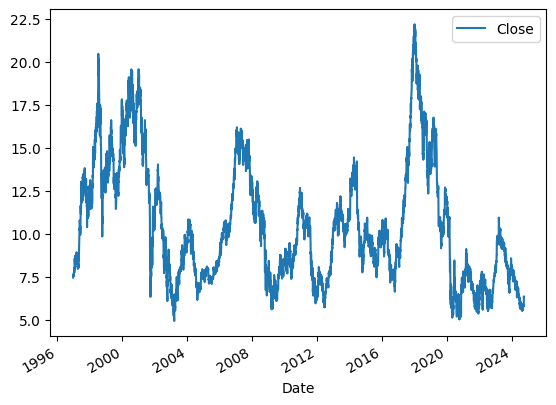

In [18]:
df.plot.line(x="Date", y="Close", use_index=True) # final index at closing times

In [73]:
# Change the index to the date arrays インデックスを日付列に変換
df.reset_index(inplace=True)

# Adjust the start of the date numbers
df['Days'] = (df['Date'] - df['Date'].min()).dt.days

In [74]:
X = df[['Days', 'Open', 'High', 'Low', 'Volume']]
y = df['Close']

<Axes: xlabel='Days'>

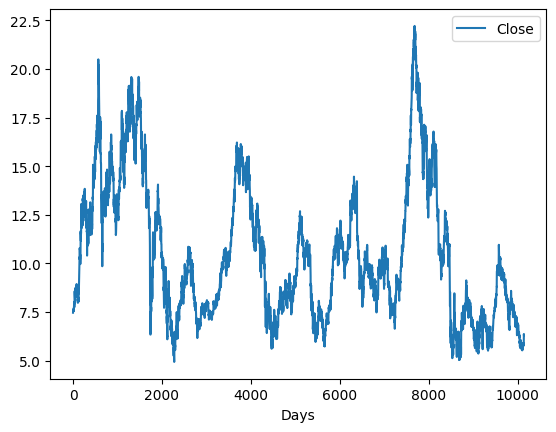

In [75]:
df.plot.line(x="Days", y="Close", use_index=True) # final index at closing times

In [ ]:
# split the datasets to test or trained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

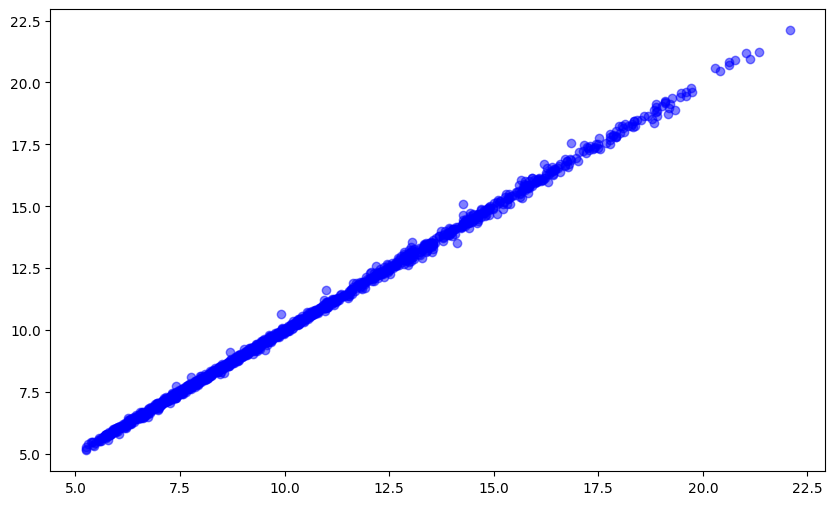

In [98]:
# visualisation
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.show()

In [88]:
# model training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [89]:
# Prediction
y_pred = model.predict(X_test_scaled)

In [90]:
# Reputation of the modelling
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [91]:
print(f'Mean squared error: {mse:.2f}')
print(f'R-squared score: {r2:.2f}')

Mean squared error: 0.01
R-squared score: 1.00


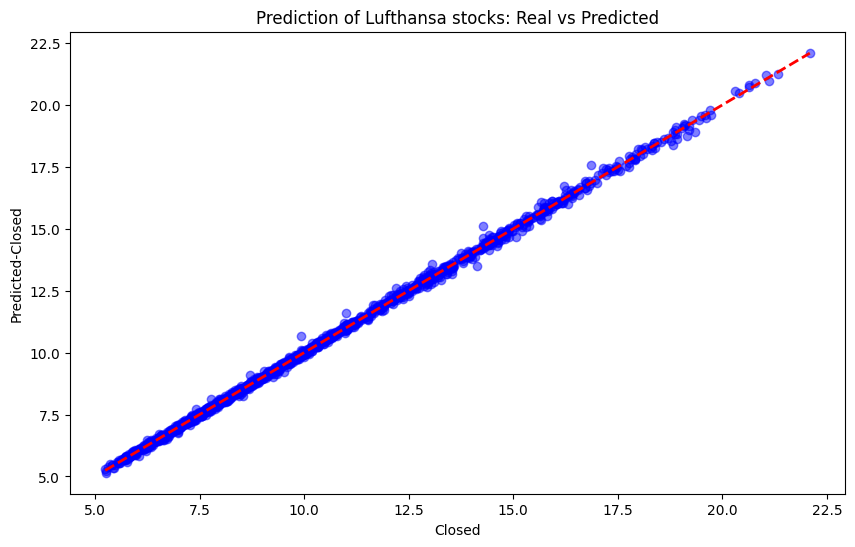

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Closed')
plt.ylabel('Predicted-Closed')
plt.title('Prediction of Lufthansa stocks: Real vs Predicted')
plt.show()


In [100]:
# Stock prediction (next 7 days)
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)
future_days = (future_dates - df['Date'].min()).days

In [101]:
future_X = pd.DataFrame({
    'Days': future_days,
    'Open': [df['Open'].iloc[-1]] * 7,
    'High': [df['High'].iloc[-1]] * 7,
    'Low': [df['Low'].iloc[-1]] * 7,
    'Volume': [df['Volume'].iloc[-1]] * 7
})


In [31]:
future_X_scaled = scaler.transform(future_X)
future_predictions = model.predict(future_X_scaled)

In [33]:
print("\nPrediction of next 7days:")
for date, price in zip(future_dates, future_predictions):
    print(f"{date.date()}: {price:.2f}")


Prediction of next 7days:
2024-09-21: 6.32
2024-09-22: 6.32
2024-09-23: 6.32
2024-09-24: 6.32
2024-09-25: 6.32
2024-09-26: 6.32
2024-09-27: 6.32


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [42]:
df = yf.download(ticker, start="2020-01-01", end="2024-09-21")

[*********************100%%**********************]  1 of 1 completed


In [102]:
# RSI
def calc_rsi(price, n=14):
    delta = price.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=n).mean()
    avg_loss = loss.rolling(window=n).mean()
    
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))


In [103]:
# Calculate the change（UP：1、DOWN：0）
df['Price_Change'] = (df['Close'] > df['Close'].shift(1)).astype(int)


In [104]:
df.reset_index(inplace=True)

df['Days'] = (df['Date'] - df['Date'].min()).dt.days

In [105]:
# rolling functions
df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA20'] = df['Close'].rolling(window=20).mean()
df['RSI'] = calc_rsi(df['Close'], 14)


In [106]:
# Delete NaN rows
df.dropna(inplace=True)

In [107]:
X = df[['Days', 'Open', 'High', 'Low', 'Volume', 'MA5', 'MA20', 'RSI']]
y = df['Price_Change']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [110]:
# RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [111]:
# Prediction
y_pred = rf_model.predict(X_test_scaled)

In [112]:
# reputation of the modelling
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.65       753
           1       0.61      0.62      0.61       667

    accuracy                           0.64      1420
   macro avg       0.63      0.63      0.63      1420
weighted avg       0.64      0.64      0.64      1420



In [113]:
# Feture importance
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print('\nFeature Importance:')
print(feature_importance)


Feature Importance:
  feature  importance
7     RSI    0.152278
4  Volume    0.138226
1    Open    0.133102
5     MA5    0.120860
3     Low    0.119200
2    High    0.117011
6    MA20    0.110887
0    Days    0.108435


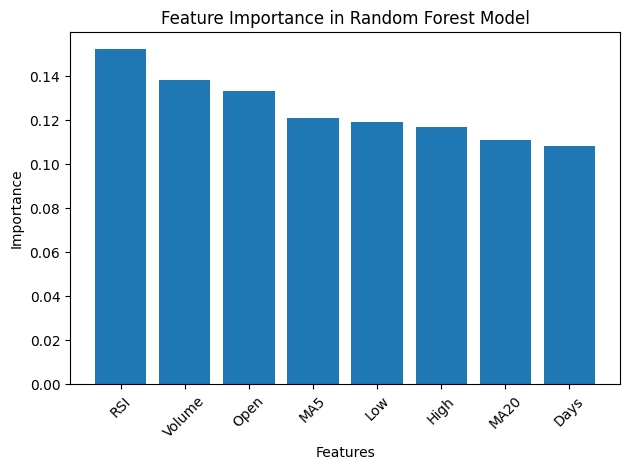

In [114]:
# Visualisation
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [115]:
# Prediction, next 7days
last_date = df['Date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7)
future_days = (future_dates - df['Date'].min()).days

future_X = pd.DataFrame({
    'Days': future_days,
    'Open': [df['Open'].iloc[-1]] * 7,
    'High': [df['High'].iloc[-1]] * 7,
    'Low': [df['Low'].iloc[-1]] * 7,
    'Volume': [df['Volume'].iloc[-1]] * 7,
    'MA5': [df['MA5'].iloc[-1]] * 7,
    'MA20': [df['MA20'].iloc[-1]] * 7,
    'RSI': [df['RSI'].iloc[-1]] * 7
})


In [116]:
future_X_scaled = scaler.transform(future_X)
future_predictions = rf_model.predict(future_X_scaled)

print("\nPredictions of next 7days:")
for date, prediction in zip(future_dates, future_predictions):
    print(f"{date.date()}: {'UP' if prediction == 1 else 'DOUWN'}")


Predictions of next 7days:
2024-09-21: DOUWN
2024-09-22: DOUWN
2024-09-23: DOUWN
2024-09-24: DOUWN
2024-09-25: DOUWN
2024-09-26: DOUWN
2024-09-27: DOUWN
